In [1]:
# sklearn.model_selection : scikit-learn 패키지 중 클래스를 나눌 때, 함수를 통해train/test를 나눌때, 모델검증에 사용되는 서브패키지
# train_test_split : 배열 또는 행렬을 임의의 훈련(train) 및 테스트(test) 하위 집합으로 분할하는 모듈
# sklearn.tree : scikit-learn 패키지 중 분류(Classification) 및 회귀(Regression)를 위한 의사결정 트리기반 모델이 있는 서브패키지
# DecisionTreeClassifier : 의사결정크리 분류모듈
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus
import os

In [2]:
tennis_data = pd.read_csv('play_tennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
# 변수 tennis_data의 각 컬럼의 값을 문자열 타입에서 숫자 타입으로 변환
#의사결정 트리 분류 모델에 train,test 데이터 값으로 사용하기 위한 전처리 과정
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [4]:
#변수 tennis_data의 컬럼(Outlook,Temperature,Humadity,Wind)의 값들을 데이터프레임 형태로 추출하고 np.array를 이용 추출데이터를 배열형태로 변환
##변수 tennis_data의 컬럼(PlayTennis)의 값을 데이터프레임 형태로 추출하고 np.array를 이용 추출데이터를 배열형태로 변환
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [5]:
#로드된 train_test_split모듈 이용 Playtennis 컬럼의 데이터를 train과 test로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
#로드된 의사결정트리분류모듈을 변수 df_clf에저장
dt_clf = DecisionTreeClassifier()
#모듈이 저장된 변수 df_clf의 함수 fit()에 변수 X_train, y_train 입력, 의사결정 트리분류모델생성
dt_clf = dt_clf.fit(X_train, y_train)
#입력한 X_test에 대한 클래스 예측값
dt_prediction = dt_clf.predict(X_test)
#오차행렬을 계산하는 모듈 confusion_matrix
print(confusion_matrix(y_test, dt_prediction))

[[0 0]
 [3 1]]


In [8]:
#분류측정항목을 보여주는 모듈 classification_report
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         0
          11       1.00      0.25      0.40         4

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



C:\Users\82102\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
#트리표현함수 tree.export_graphviz()
os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
#target class 값인 'Play No', 'Play Yes' 를 배열형태로 변수 target_name에 저장
target_name = np.array(['Play No', 'Play Yes'])

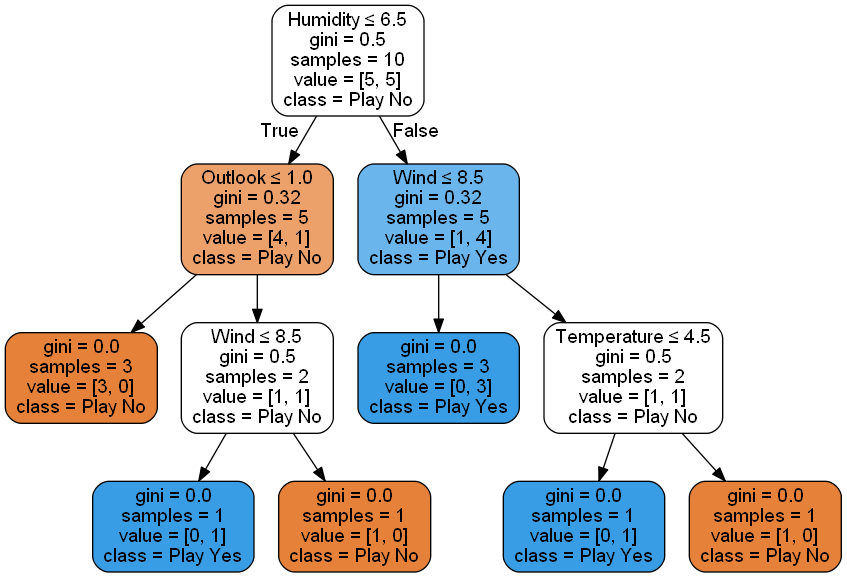

In [10]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None, 
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True, 
                                   special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
import os
os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
Image(dt_graph.create_png())